In [1]:
from oceantracker.post_processing.read_output_files.load_output_files import load_particle_track_vars
from oceantracker.post_processing.read_output_files.load_output_files import get_case_info_files_from_dir

import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_to_dir = '/work/uh0296/u301513/ot_output/22_07_27_retention_v04'
cases = get_case_info_files_from_dir(path_to_dir)

In [5]:
count_on_bottom = np.zeros( (len(cases),int(1e6) ))
print(count_on_bottom.shape)
for jj,case in enumerate(cases):
    tracks = load_particle_track_vars(case)

    not_dead = tracks['status'][tracks['status'] != -2]

    for ii in range(tracks['status'].shape[1]):
        count_on_bottom[jj,ii] = len(tracks['status'][:,ii][tracks['status'][:,ii]==6])
        



(253, 1000000)


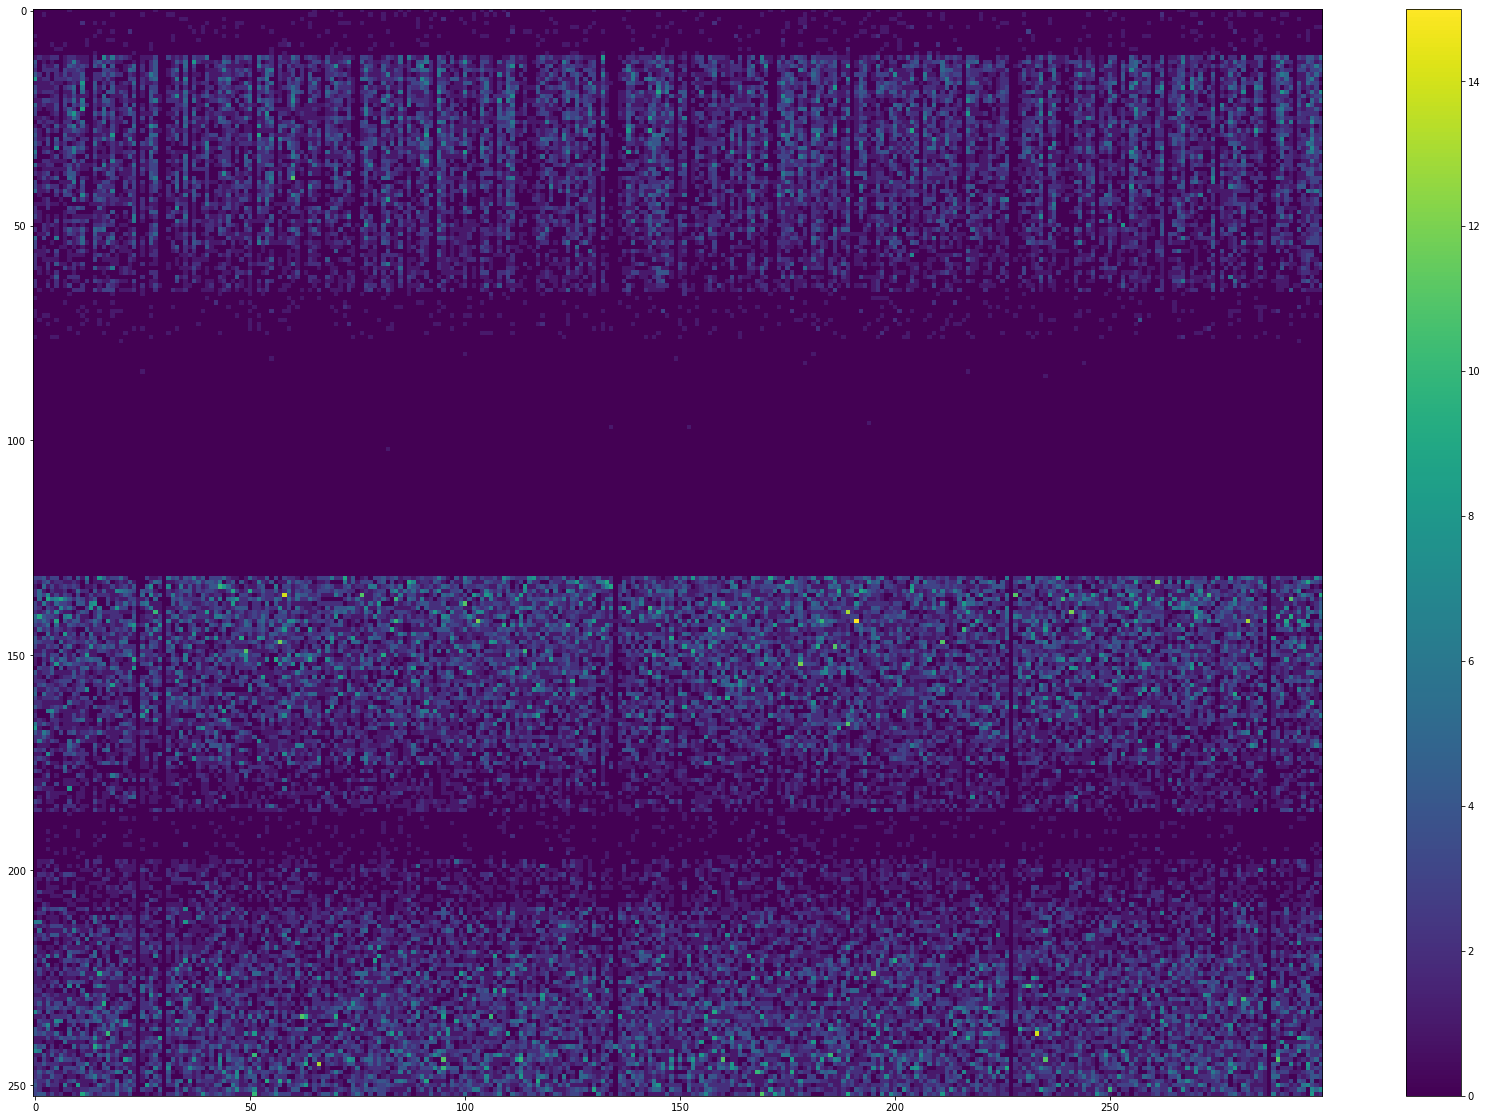

In [42]:
plt.figure(figsize=(30,20))
plt.imshow(count_on_bottom[:,:int(3e2)])
plt.colorbar()

In [6]:
from netCDF4 import Dataset
df = Dataset('/work/uh0296/u301513/ot_output/22_07_27_retention_v04/22_07_27_retention_v04_C001_tracks.nc')
list(df.variables)

['particles_written_per_time_step',
 'particle_ID',
 'write_step_index',
 'time',
 'x',
 'status',
 'age',
 'ID',
 'IDrelease_group',
 'user_release_group_ID',
 'IDpulse',
 'time_released',
 'x_last_good',
 'x0',
 'water_depth',
 'water_salinity',
 'tide',
 'total_water_depth',
 'water_velocity_depth_average',
 'stranded_dryout',
 'light_limitation',
 'friction_velocity']

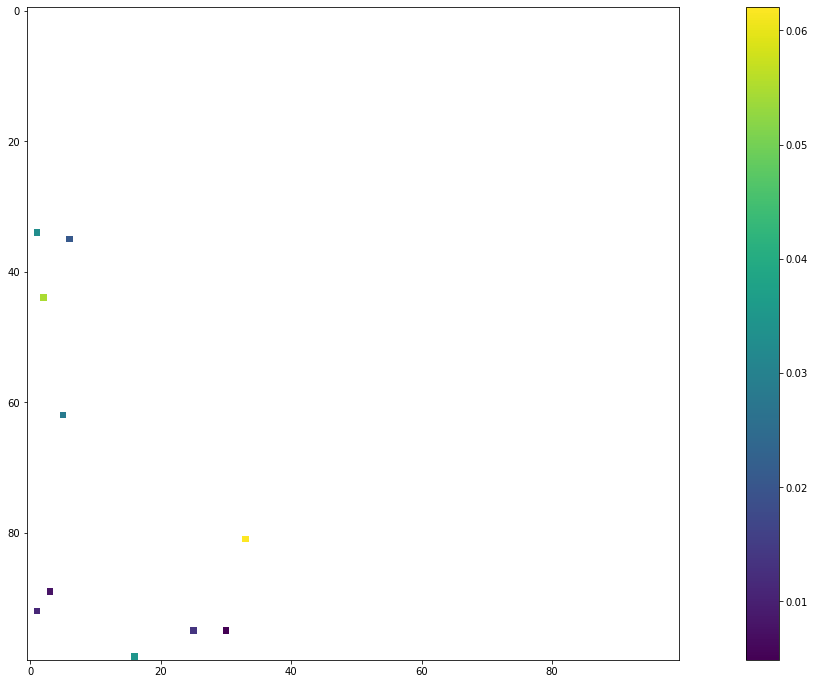

In [27]:

tracks = load_particle_track_vars(cases[2],var_list=['friction_velocity'])
plt.figure(figsize=(24,12))
tracks['friction_velocity'][tracks['status'] != 6] = np.nan

plt.imshow(np.swapaxes(tracks['friction_velocity'],0,1)[:100,:100])
plt.colorbar()

In [45]:
len(tracks['friction_velocity'][tracks['friction_velocity'] > 0.02])/len(tracks['friction_velocity'][tracks['friction_velocity'] >= 0.0])

0.5703275529865125